In [2]:
import pandas as pd

data_full = pd.read_excel("data/Capstone_Final_Dataset.xlsx")

In [3]:
data_full

,Organization,Category,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),...,Label,Tier,Verified Grant URL / Contact,Confirmed Application Deadlines,Strategic Note / Pitch Angle,Partnership Potential,Best Pitch Angle,Enhanced Notes,Contact Person,Application Process
0,Kickstarter,Crowdfunding,1,0,0,0,0,0,0,0,...,NaN,3.0,https://www.kickstarter.com/,Rolling,"Best for a specific, tangible project (e.g., '...",Community integration,Sports-math curriculum,Best for project-based funding with tangible r...,https://www.kickstarter.com/,Rolling
1,Indiegogo,Crowdfunding,1,0,0,0,0,0,0,0,...,NaN,3.0,https://www.indiegogo.com/,Rolling,"A strong alternative to Kickstarter, especiall...",Community integration,Sports-math curriculum,Similar to Kickstarter but offers more flexibl...,https://www.indiegogo.com/,Rolling
2,University of Florida Foundation,Collegiate,0,1,0,0,0,0,0,0,...,NaN,1.0,"Kim Kruse, Corporate & Foundation Giving: ktk@...",Varies; partnership-based,LOCAL ADVANTAGE. Propose a research partnershi...,Pilot programs,College prep through sports learning,Directly approaching the Corporate & Foundatio...,"Kim Kruse, Corporate & Foundation Giving: ktk@...",Research needed
3,Florida State University Research Foundation,Collegiate,0,1,0,0,0,0,0,0,...,NaN,1.0,research@magnet.fsu.edu; https://www.research....,Varies by program,"LOCAL ADVANTAGE. Target the GAP program, posit...",Pilot programs,College prep through sports learning,The 'Grants for Application Proof of Concept (...,research@magnet.fsu.edu,Research needed
4,NFL Foundation,Pro Sports League,0,0,1,0,0,0,0,0,...,NaN,3.0,https://www.nflfoundation.org/applications/gra...,Youth Camp Grants: ~Apr 15; YET Grants: ~Dec 3...,Initial intelligence about a mandatory partner...,Community integration,Football statistics and math skills,Key Intel: The NFL's grantmaking is in partner...,https://bobwoodrufffoundation.org/programs/net...,Research needed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Y Combinator,Venture Capital,0,0,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,Berkeley SkyDeck Fund (UC Berkeley),Collegiate,0,1,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,VELA Education Fund,Education Foundation,0,0,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,DonorsChoose (technology classroom projects),Crowdfunding,1,0,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_full.columns.unique()

Index(['Organization', 'Category', 'Crowdfunding', 'Collegiate',
       'Pro Sports League', 'Pro Sports (NFL)', 'Pro Sports (MLB)',
       'Pro Sports (USL)', 'Pro Sports (NBA)', 'Pro Sports (MLS)',
       'Pro Sports (NHL)', 'Thought Leader', 'National Non-Profit',
       'Federal Grant', 'Venture Capital', 'Athlete Foundation',
       'Corporate Foundation', 'Education Foundation', 'Geographic Scope',
       'Geo_Focus', 'Mission / Stated Pillars', 'Financial Funder',
       'Typical Grant Size', 'Typical Min. Grant Size',
       'Typical Max. Grant Size', 'DEI Priorities', 'Label', 'Tier',
       'Verified Grant URL / Contact', 'Confirmed Application Deadlines',
       'Strategic Note / Pitch Angle', 'Partnership Potential',
       'Best Pitch Angle', 'Enhanced Notes', 'Contact Person',
       'Application Process'],
      dtype='object')

In [5]:
#First I will keep only Geo info, Category info, Grant info, and Mission/Pillar info
data_full = data_full.drop(columns=[
    'Category', 
    'Geographic Scope',
    'DEI Priorities', 'Tier',
    'Verified Grant URL / Contact', 'Confirmed Application Deadlines',
    'Strategic Note / Pitch Angle', 'Partnership Potential',
    'Best Pitch Angle', 'Enhanced Notes', 'Contact Person', 'Typical Grant Size',
    'Application Process'
])


In [6]:
data_full.columns.unique()

Index(['Organization', 'Crowdfunding', 'Collegiate', 'Pro Sports League',
       'Pro Sports (NFL)', 'Pro Sports (MLB)', 'Pro Sports (USL)',
       'Pro Sports (NBA)', 'Pro Sports (MLS)', 'Pro Sports (NHL)',
       'Thought Leader', 'National Non-Profit', 'Federal Grant',
       'Venture Capital', 'Athlete Foundation', 'Corporate Foundation',
       'Education Foundation', 'Geo_Focus', 'Mission / Stated Pillars',
       'Financial Funder', 'Typical Min. Grant Size',
       'Typical Max. Grant Size', 'Label'],
      dtype='object')

In [7]:
mask = (
    (data_full['Financial Funder'] == 1) &
    data_full['Typical Min. Grant Size'].notna() &
    data_full['Typical Max. Grant Size'].notna()
)
data_full = data_full.loc[mask].copy()

In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 209
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Organization              69 non-null     object 
 1   Crowdfunding              69 non-null     int64  
 2   Collegiate                69 non-null     int64  
 3   Pro Sports League         69 non-null     int64  
 4   Pro Sports (NFL)          69 non-null     int64  
 5   Pro Sports (MLB)          69 non-null     int64  
 6   Pro Sports (USL)          69 non-null     int64  
 7   Pro Sports (NBA)          69 non-null     int64  
 8   Pro Sports (MLS)          69 non-null     int64  
 9   Pro Sports (NHL)          69 non-null     int64  
 10  Thought Leader            69 non-null     int64  
 11  National Non-Profit       69 non-null     int64  
 12  Federal Grant             69 non-null     int64  
 13  Venture Capital           69 non-null     int64  
 14  Athlete Foundati

In [9]:
display(data_full.head())

,Organization,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),Pro Sports (NHL),...,Venture Capital,Athlete Foundation,Corporate Foundation,Education Foundation,Geo_Focus,Mission / Stated Pillars,Financial Funder,Typical Min. Grant Size,Typical Max. Grant Size,Label
0,Kickstarter,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,"Platform for creative, project-based funding w...",1.0,1000.0,10000.0,NaN
1,Indiegogo,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Similar to Kickstarter but offers more flexibl...,1.0,1000.0,10000.0,NaN
2,University of Florida Foundation,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,"Supports UF's mission of research, education, ...",1.0,5000.0,50000.0,NaN
3,Florida State University Research Foundation,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,The 'Grants for Application Proof of Concept (...,1.0,5000.0,50000.0,NaN
5,NBA Foundation,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,Economic empowerment and career advancement fo...,1.0,100000.0,1000000.0,NaN


In [10]:

import re
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# --- 0) Light text clean (keep punctuation/stopwords) ---
def clean_mission(s):
    if pd.isna(s):
        return ""
    s = str(s)
    s = s.replace("\n", " ").replace("\r", " ")
    s = re.sub(r"\s*[\u2022•·\-–—]\s*", "; ", s)  # bullets -> semicolons
    s = re.sub(r"\s+", " ", s).strip()
    return s

data_full['mission_clean'] = data_full['Mission / Stated Pillars'].apply(clean_mission)

# --- 1) Embed with MiniLM (384-d) ---
model = SentenceTransformer('all-MiniLM-L6-v2')
# Optional (if some missions are long): model.max_seq_length = 384
mission_embeddings = model.encode(
    data_full['mission_clean'].tolist(),
    normalize_embeddings=True,           # good for cosine-based work
    show_progress_bar=False
)  # shape: (59, 384)

# --- 2) PCA reduction to 30-d (fit once, reuse pca later for new data) ---
pca = PCA(n_components=30, random_state=42)
mission_pca = pca.fit_transform(mission_embeddings)  # shape: (59, 30)

# --- 3) Attach to DataFrame (one column per component) ---
pca_cols = [f'mission_pca_{i+1:02d}' for i in range(mission_pca.shape[1])]
data_full[pca_cols] = mission_pca

# (Optional) cache to disk so you don’t recompute
# np.save('mission_embeddings_minilm.npy', mission_embeddings)
# np.save('mission_embeddings_pca30.npy', mission_pca)

# Quick sanity check
print(mission_embeddings.shape, mission_pca.shape)
print(data_full[pca_cols].head(2))


(69, 384) (69, 30)
   mission_pca_01  mission_pca_02  mission_pca_03  mission_pca_04  \
0         0.47083       -0.178838        0.180994       -0.159725   
1         0.51868       -0.232775        0.163041       -0.228144   

   mission_pca_05  mission_pca_06  mission_pca_07  mission_pca_08  \
0        0.035547        0.016855        0.290454        0.160108   
1       -0.088852        0.046759        0.216511        0.057759   

   mission_pca_09  mission_pca_10  ...  mission_pca_21  mission_pca_22  \
0        0.052444       -0.160938  ...       -0.000345       -0.026800   
1        0.016384       -0.162377  ...       -0.044419        0.007971   

   mission_pca_23  mission_pca_24  mission_pca_25  mission_pca_26  \
0       -0.172658        0.037441        0.170283       -0.106452   
1        0.052227        0.163490        0.094854       -0.104771   

   mission_pca_27  mission_pca_28  mission_pca_29  mission_pca_30  
0       -0.102741       -0.052286        0.028475        0.066509 

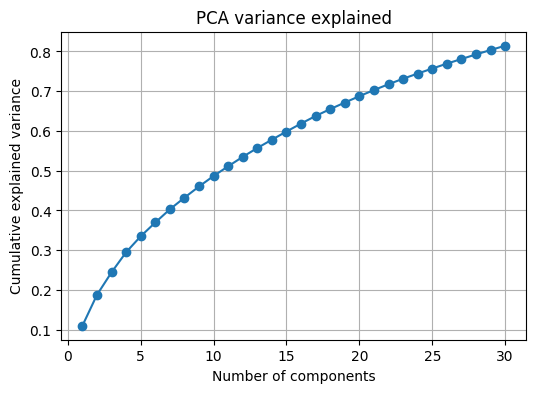

PCs=1: cumulative variance=0.110
PCs=2: cumulative variance=0.188
PCs=3: cumulative variance=0.245
PCs=4: cumulative variance=0.295
PCs=5: cumulative variance=0.335
PCs=6: cumulative variance=0.370
PCs=7: cumulative variance=0.403
PCs=8: cumulative variance=0.432
PCs=9: cumulative variance=0.460
PCs=10: cumulative variance=0.487
PCs=11: cumulative variance=0.511
PCs=12: cumulative variance=0.535
PCs=13: cumulative variance=0.557
PCs=14: cumulative variance=0.578
PCs=15: cumulative variance=0.599
PCs=16: cumulative variance=0.619
PCs=17: cumulative variance=0.638
PCs=18: cumulative variance=0.655
PCs=19: cumulative variance=0.671
PCs=20: cumulative variance=0.687
PCs=21: cumulative variance=0.703
PCs=22: cumulative variance=0.717
PCs=23: cumulative variance=0.731
PCs=24: cumulative variance=0.744
PCs=25: cumulative variance=0.757
PCs=26: cumulative variance=0.769
PCs=27: cumulative variance=0.781
PCs=28: cumulative variance=0.792
PCs=29: cumulative variance=0.804
PCs=30: cumulative vari

In [34]:
import matplotlib.pyplot as plt
import numpy as np

expl_var = pca.explained_variance_ratio_
cum_var = np.cumsum(expl_var)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA variance explained")
plt.grid(True)
plt.show()

# print top few values
for i, v in enumerate(cum_var[:50], 1):
    print(f"PCs={i}: cumulative variance={v:.3f}")


In [35]:
data_full.head()

,Organization,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),Pro Sports (NHL),...,mission_pca_21,mission_pca_22,mission_pca_23,mission_pca_24,mission_pca_25,mission_pca_26,mission_pca_27,mission_pca_28,mission_pca_29,mission_pca_30
0,Kickstarter,1,0,0,0,0,0,0,0,0,...,-0.000345,-0.026800,-0.172658,0.037441,0.170283,-0.106452,-0.102741,-0.052286,0.028475,0.066509
1,Indiegogo,1,0,0,0,0,0,0,0,0,...,-0.044419,0.007971,0.052227,0.163490,0.094854,-0.104771,-0.008519,0.065045,0.022235,0.169228
2,University of Florida Foundation,0,1,0,0,0,0,0,0,0,...,0.139674,-0.047102,-0.131791,0.008696,0.075237,0.166217,0.029005,-0.018860,0.078029,0.010959
3,Florida State University Research Foundation,0,1,0,0,0,0,0,0,0,...,-0.125675,0.217092,0.085700,-0.033291,-0.108053,0.027276,0.120652,0.025620,-0.085922,-0.127444
5,NBA Foundation,0,0,1,0,0,0,0,0,0,...,-0.118706,-0.042467,-0.082706,-0.098026,0.074340,-0.151715,0.011385,-0.055144,0.022179,0.027385


In [36]:
data_full = data_full.dropna(subset=['mission_clean'])


FIRST we look at kmeans.
1. K-Means (standard, Euclidean distance)
How it works

K-Means minimizes Euclidean distance between points and cluster centroids.
It assumes all features are continuous and roughly on the same scale.

Preprocessing rationale for K-Means clustering
----------------------------------------------
We combine four feature blocks:
  (1) Mission text -> sentence embeddings -> PCA to 30 dims (mission_pca_*).
      - PCA denoises and reduces 384→30 so distances are stable with n=59.
      - These are already on a reasonable numeric scale.

  (2) Category flags (one-hot 0/1) + Geo_Focus (0/1).
      - Binary indicators are fine for Euclidean K-Means; no extra scaling needed.

  (3) Grant sizes (Typical Min/Max).
      - We apply log1p to compress heavy tails (orders of magnitude).
      - Then StandardScaler (z-score) so each grant column has mean≈0, std≈1.
      - Negative values here are NORMAL: they mean “below the dataset average”
        in standard deviations (not negative dollars).

Why not MinMax [0,1] for everything?
  - K-Means uses Euclidean distance; z-scoring keeps each continuous feature
    comparable by variance and prevents large-magnitude columns from dominating.
  - One-hot 0/1 categories already live on a small, consistent scale.

Net effect:
  - Text semantics (30 PCA comps), binary categories, geo flag, and scaled grants
    all contribute on comparable scales, yielding more meaningful K-Means clusters.

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ---- columns you'll use for K-Means ----
mission_pca_cols = [c for c in data_full.columns if c.startswith('mission_pca_')]
category_cols = [
    'Crowdfunding','Collegiate','Pro Sports League','Pro Sports (NFL)','Pro Sports (MLB)',
    'Pro Sports (USL)','Pro Sports (NBA)','Pro Sports (MLS)','Pro Sports (NHL)',
    'Thought Leader','National Non-Profit','Federal Grant','Venture Capital',
    'Athlete Foundation','Corporate Foundation','Education Foundation'
]
grant_cols = ['Typical Min. Grant Size','Typical Max. Grant Size']

# ---- 1) scale grants IN MEMORY (do not touch data_full) ----
grants_log = np.log1p(data_full[grant_cols].clip(lower=0).to_numpy())
grant_scaler = StandardScaler().fit(grants_log)
grants_scaled = grant_scaler.transform(grants_log)

# optional: keep names
grant_scaled_df = pd.DataFrame(grants_scaled, index=data_full.index,
                               columns=['grant_min_scaled','grant_max_scaled'])

# ---- 2) assemble a NEW dataframe for kmeans ----
df_kmeans = pd.concat([
    data_full[['Organization']],                 # keep identifier for inspection
    data_full[mission_pca_cols],                 # 30 PCA dims
    data_full[category_cols],                    # one-hots
    data_full[['Geo_Focus']],                    # 0/1
    grant_scaled_df                              # scaled grants
], axis=1)

# df_kmeans is ready for K-Means; data_full unchanged
print(df_kmeans.shape)
df_kmeans.head(10)


(69, 50)


,Organization,mission_pca_01,mission_pca_02,mission_pca_03,mission_pca_04,mission_pca_05,mission_pca_06,mission_pca_07,mission_pca_08,mission_pca_09,...,Thought Leader,National Non-Profit,Federal Grant,Venture Capital,Athlete Foundation,Corporate Foundation,Education Foundation,Geo_Focus,grant_min_scaled,grant_max_scaled
0,Kickstarter,0.470830,-0.178838,0.180994,-0.159725,0.035547,0.016855,0.290454,0.160108,0.052444,...,0,0,0,0,0,0,0,1,-1.386311,-0.918890
1,Indiegogo,0.518680,-0.232775,0.163041,-0.228144,-0.088852,0.046759,0.216511,0.057759,0.016384,...,0,0,0,0,0,0,0,1,-1.386311,-0.918890
2,University of Florida Foundation,0.330977,-0.060723,0.006692,0.103488,-0.054402,0.151437,-0.122117,-0.181409,0.030638,...,0,0,0,0,0,0,0,0,-0.540640,-0.096280
3,Florida State University Research Foundation,0.399512,-0.261453,0.096824,-0.095133,0.000832,-0.000721,0.180887,-0.014717,-0.217587,...,0,0,0,0,0,0,0,0,-0.540640,-0.096280
5,NBA Foundation,-0.175617,0.020525,-0.242396,-0.131270,-0.105318,-0.223381,0.087736,-0.065552,-0.193134,...,0,0,0,0,0,0,0,1,1.034136,1.434952
6,San Francisco 49ers Foundation,-0.077443,-0.129440,-0.247702,-0.000087,-0.144156,-0.015123,0.114997,0.102408,-0.362013,...,0,0,0,0,0,0,0,0,-1.386311,1.080657
7,Los Angeles Dodgers Foundation,-0.184837,0.066925,-0.285882,0.097444,0.100554,0.033759,0.086876,-0.083640,-0.133407,...,0,0,0,0,0,0,0,0,-0.540640,-0.450566
8,Cleveland Browns Foundation,-0.226546,-0.066192,-0.141185,-0.189670,-0.036988,0.071331,-0.129245,0.047088,0.204731,...,0,0,0,0,0,0,0,0,-0.540640,-0.450566
9,Miami Dolphins Foundation,-0.221326,0.023345,-0.283481,-0.140105,-0.107721,0.100371,0.027605,0.171605,0.157618,...,0,0,0,0,0,0,0,0,-0.728101,-0.918890
11,Dallas Mavericks Foundation,-0.089480,0.329694,-0.293719,0.253058,0.135134,0.034490,0.119967,0.002066,0.093219,...,0,0,0,0,0,0,0,0,-0.540640,-0.450566


FIRST we cluster on all columns. except for organization.

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_kmeans.drop(columns=['Organization']).to_numpy(dtype=float)

best = (None, None)
for k in range(4, 9):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"k={k}: silhouette={sil:.3f}")
    if best[0] is None or sil > best[0]:
        best = (sil, (k, labels, km))

sil, (k_best, labels_best, km_best) = best
print(f"\nBest k={k_best} (sil={sil:.3f})")
df_kmeans['cluster_kmeans'] = labels_best


k=4: silhouette=0.241
k=5: silhouette=0.221
k=6: silhouette=0.239
k=7: silhouette=0.226
k=8: silhouette=0.216

Best k=4 (sil=0.241)


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

def kmeans_labels(X, k, seed):
    km = KMeans(n_clusters=k, n_init=20, random_state=seed)
    return km.fit_predict(X)

k = 4  # try also k=5
labels_list = [kmeans_labels(X, k, s) for s in range(10)]
stability = np.mean([
    adjusted_rand_score(labels_list[i], labels_list[j])
    for i in range(len(labels_list)) for j in range(i+1,len(labels_list))
])
print(f"ARI stability for k={k}: {stability:.3f}")


ARI stability for k=4: 0.864



Cluster stability assessment
----------------------------
We used Adjusted Rand Index (ARI) to measure the consistency of cluster
assignments across 10 random initializations of K-Means.

Results:
  k = 4 → ARI = 0.8  ( high stability) with highest sil score

Interpretation:
  - ARI close to 1.0 indicates that repeated runs of K-Means produce nearly
    identical partitions — i.e., clusters are well separated and reproducible.
  - ARI near 0 means unstable, random-like cluster assignments.

Conclusion:
  - k = 4 yields highly stable clusters and a silhouette (≈0.24) close to the
    best overall. Because stability is not much lower at k=4 with
    smalll gain in sil, we select **k=4** as the final, interpretable,
    and robust clustering configuration.

/opt/anaconda3/envs/Iterlight/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


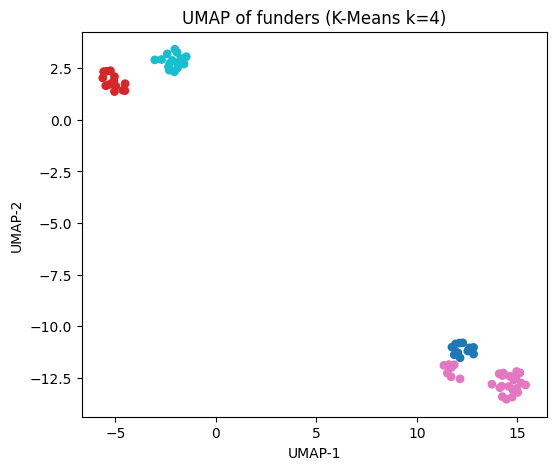

In [40]:
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt

# --- choose your final k ---
k_best = 4   # <-- set this to 5 based on your stability results

# --- prepare your feature matrix ---
X = df_kmeans.drop(columns=['Organization']).to_numpy(float)

# --- fit K-Means and attach labels ---
kmeans = KMeans(n_clusters=k_best, n_init=20, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(X)

# --- reduce to 2D with UMAP for visualization ---
reducer = umap.UMAP(random_state=42)
Z = reducer.fit_transform(X)

# --- plot ---
plt.figure(figsize=(6,5))
plt.scatter(Z[:,0], Z[:,1], c=df_kmeans['cluster'], s=28, cmap='tab10')
plt.title(f"UMAP of funders (K-Means k={k_best})")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()



In [41]:
feature_cols = df_kmeans.drop(columns=['Organization', 'cluster_kmeans']).columns
cluster_means = df_kmeans.groupby('cluster_kmeans')[feature_cols].mean().round(2)
display(cluster_means.T.sort_index())


cluster_kmeans,0,1,2,3
Athlete Foundation,0.00,0.07,0.00,0.00
Collegiate,0.12,0.07,0.08,0.00
Corporate Foundation,0.00,0.00,0.08,0.00
Crowdfunding,0.00,0.00,0.25,0.00
Education Foundation,0.00,0.00,0.08,0.00
Federal Grant,0.00,0.29,0.00,0.00
Geo_Focus,0.19,0.86,0.67,0.26
National Non-Profit,0.06,0.00,0.00,0.00
Pro Sports (MLB),0.12,0.00,0.08,0.00
Pro Sports (MLS),0.00,0.00,0.17,0.00


K-Means clustering revealed four distinct funder archetypes within the dataset. Cluster 0 consists primarily of professional sports foundations—especially NBA-affiliated organizations—with national reach and average-sized grants. Cluster 1 contains large institutional and government-linked funders, including federal grant programs and venture-capital–style entities; these funders exhibit strong regional focus and the largest average grant sizes. Cluster 2 represents grassroots and small private foundations, many relying on crowdfunding models, offering the smallest grants and maintaining moderate geographic concentration. Finally, Cluster 3 is composed entirely of NFL-affiliated foundations, operating with slightly below-average grant capacity and limited regional focus. Together, these clusters provide a clear segmentation of the funding landscape by organizational type, grant capacity, and geographic orientation

In [42]:
import numpy as np

pca_cols = [c for c in data_full.columns if c.startswith('mission_pca_')]
X = data_full[pca_cols].to_numpy(float)

# cosine-friendly: L2-normalize rows (so cosine ~ dot product)
X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = range(2, 10)  # try a small grid
sil = {}
for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_norm)
    sil[k] = silhouette_score(X_norm, labels, metric='cosine')
    print(f"k={k}: silhouette(cosine)={sil[k]:.3f}")

k_best = max(sil, key=sil.get)
print("Chosen k:", k_best, " (silhouette:", sil[k_best], ")")

km = KMeans(n_clusters=k_best, n_init=100, random_state=42)
labels = km.fit_predict(X_norm)
data_full['cluster_mission'] = labels


k=2: silhouette(cosine)=0.169
k=3: silhouette(cosine)=0.171
k=4: silhouette(cosine)=0.162
k=5: silhouette(cosine)=0.163
k=6: silhouette(cosine)=0.158
k=7: silhouette(cosine)=0.155
k=8: silhouette(cosine)=0.145
k=9: silhouette(cosine)=0.139
Chosen k: 3  (silhouette: 0.17084608927125255 )


In [44]:
import numpy as np

pca_cols = [c for c in data_full.columns if c.startswith('mission_pca_')]
X = data_full[pca_cols].to_numpy(float)
# row-normalize so Euclidean ~ cosine
X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def kmeans_cosine_silhouette(Xn, ks=range(2,10), n_init=100, seed=42):
    sil = {}
    models = {}
    labels_dict = {}
    for k in ks:
        km = KMeans(n_clusters=k, n_init=n_init, random_state=seed)
        lab = km.fit_predict(Xn)
        s = silhouette_score(Xn, lab, metric='cosine')
        sil[k] = s
        models[k] = km
        labels_dict[k] = lab
        print(f"k={k}: silhouette(cosine)={s:.3f}")
    # choose best k
    k_best = max(sil, key=sil.get)
    print(f"\nChosen k: {k_best} (silhouette: {sil[k_best]:.3f})")
    return k_best, sil, models, labels_dict

k_best, sil, models, labels_dict = kmeans_cosine_silhouette(X_norm, ks=range(2,10))
data_full['cluster_mission'] = labels_dict[k_best]


k=2: silhouette(cosine)=0.169
k=3: silhouette(cosine)=0.171
k=4: silhouette(cosine)=0.162
k=5: silhouette(cosine)=0.163
k=6: silhouette(cosine)=0.158
k=7: silhouette(cosine)=0.159
k=8: silhouette(cosine)=0.145
k=9: silhouette(cosine)=0.146

Chosen k: 3 (silhouette: 0.171)


In [46]:
k_use = k_best  # try k_use=2 if you want the simpler split
labels = labels_dict[k_use]
km = models[k_use]
data_full['cluster_mission'] = labels


/opt/anaconda3/envs/Iterlight/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


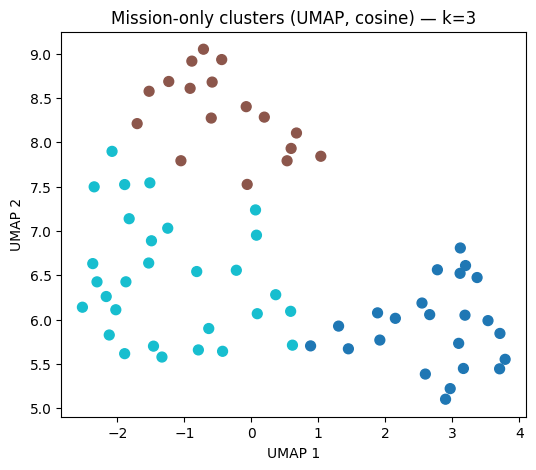

In [47]:
import umap.umap_ as umap

um = umap.UMAP(random_state=42, n_neighbors=10, min_dist=0.1, metric='cosine')
X_2d = um.fit_transform(X_norm)

plt.figure(figsize=(6,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, s=50, cmap='tab10')
plt.title(f"Mission-only clusters (UMAP, cosine) — k={k_use}")
plt.xlabel("UMAP 1"); plt.ylabel("UMAP 2")
plt.show()



In [48]:
# centroids in normalized space (KMeans centers are not guaranteed unit-norm; normalize)
centroids = km.cluster_centers_
centroids = centroids / np.linalg.norm(centroids, axis=1, keepdims=True)

def top_exemplars(XN, labels, names, centroids, topn=6):
    out = {}
    for c in range(centroids.shape[0]):
        idx = np.where(labels == c)[0]
        sims = XN[idx] @ centroids[c]  # cosine ~ dot (because rows are normed)
        order = np.argsort(-sims)[:topn]
        out[c] = [names[i] for i in idx[order]]
    return out

exemplars = top_exemplars(
    X_norm, labels, data_full['Organization'].tolist(), centroids, topn=6
)

for c, orgs in exemplars.items():
    print(f"\nCluster {c} — exemplars:")
    for o in orgs:
        print("  •", o)



Cluster 0 — exemplars:
  • Indiegogo
  • Kickstarter
  • Reach Capital (ed-tech VC)
  • Berkeley SkyDeck Fund (UC Berkeley)
  • University of Florida Foundation
  • Y Combinator

Cluster 1 — exemplars:
  • Boston Red Sox Foundation
  • Chicago Cubs Charities
  • Seattle Sounders FC RAVE Foundation
  • Florida Panthers Foundation
  • Memphis Grizzlies Foundation
  • National Hockey League (NHL) Foundation U.S.

Cluster 2 — exemplars:
  • New Orleans Saints - Gulf Coast Renewal Fund
  • Detroit Lions Charities
  • Nashville SC Community Fund
  • Dallas Cowboys Foundation
  • Baltimore Ravens Foundation
  • Los Angeles Rams Foundation


In [49]:
import re
from collections import Counter

def tokenize(s):
    return re.findall(r"[A-Za-z][A-Za-z\-']+", str(s).lower())

stop = set("""
the a an and of for to with in on at by from our we they their them
is are be as that this these those into across within among about
""".split())

def cluster_top_terms(df, text_col='mission_clean', label_col='cluster_mission', topn=12):
    out = {}
    for c in sorted(df[label_col].unique()):
        toks = []
        for t in df.loc[df[label_col]==c, text_col].fillna(""):
            toks.extend([w for w in tokenize(t) if w not in stop and len(w) > 2])
        out[c] = [w for w,_ in Counter(toks).most_common(topn)]
    return out

top_terms = cluster_top_terms(data_full, 'mission_clean', 'cluster_mission', topn=12)
for c, terms in top_terms.items():
    print(f"\nCluster {c} — top words:\n  {', '.join(terms)}")



Cluster 0 — top words:
  mission, education, supports, research, non, world, help, portfolio, learning, health, through, based

Cluster 1 — top words:
  education, health, youth, children, families, hockey, well, being, focus, development, women, provides

Cluster 2 — top words:
  youth, education, focuses, development, supports, programs, community, health, supporting, key, non, profits


In [51]:
!pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 80.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [bertopic]1/3 [plotly]


In [53]:
!pip install -U "sentence-transformers>=3.0.1" "bertopic>=0.16.3" umap-learn hdbscan


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.8 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.40-cp310-cp310-macosx_11_0_arm64.whl size=688604 sha256=f31e809e18de1dede6ec4fc5ad14594c69d3b977e1668fc64eacf8d68be36cd8
  Stored in directory: /Users/evanbeck/Library/Caches/pip/wheels/54/ba/75/e1883bf767fda8494225c99b81fbf5e977e23459d35e93b301
Successfully built hdbscan
  Attempting uninstall: hdbscan
    Found existing installation: hdbscan 0.8.39
    Uninstalling hdbscan-0.8.39:
      Successfully uninstalled hdbscan-0.8.39━━━ 0/2 [hdbscan]
  Attempting uninstall: sentence-transformers 0/2 [hdbscan]
    Found existing installation: sentence-transformers 2.7.0m [hdbscan]
    Uninstalling sentence-transformers-2.7.0: 0/2 [hdbscan]
      Successfully uninstalled sentence-transformers-2.7.0 [hdbscan]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [54]:
from bertopic import BERTopic
topic_model = BERTopic(language="english", min_topic_size=3, n_gram_range=(1,2))
topics, probs = topic_model.fit_transform(data_full['mission_clean'])
topic_model.get_topic_info().head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,21,-1_youth_on_and_education,"[youth, on, and, education, to, in, supporting...",[Focuses on community betterment and youth dev...
1,0,15,0_the_to_and_mission,"[the, to, and, mission, of, is, learning, for,...",[The mission of the Institute of Education Sci...
2,1,12,1_and_health_youth_education,"[and, health, youth, education, hockey, progra...",[Youth Development (to boost academic performa...
3,2,6,2_development_youth_on_and,"[development, youth, on, and, education and, f...",[Ensure youth in Ohio receive the development ...
4,3,5,3_justice_grant_and_equity,"[justice, grant, and, equity, black, racial eq...",[Economic empowerment and career advancement f...


maybe justice development education

In [56]:
!pip install -U "bertopic>=0.16.4" "sentence-transformers>=3.0.1" "umap-learn>=0.5.6" "hdbscan>=0.8.37"


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [58]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

docs = data_full['mission_clean'].fillna("").tolist()

extra_stop = {
    "mission","organization","foundation","program","programs","support","supports","supporting",
    "provide","provides","providing","work","working",
    "community","communities","non","profit","nonprofit","charitable",
    "youth","children","families","students","education","educational","learning","school","schools",
    "health","well","being","wellbeing","through","across","within","including","focus","focused","focuses"
}
stopwords = ENGLISH_STOP_WORDS.union(extra_stop)

vectorizer = CountVectorizer(stop_words=list(stopwords), ngram_range=(1,2), min_df=2, max_df=0.9)

embedder = SentenceTransformer("all-MiniLM-L6-v2")  # TEXT-ONLY
topic_model = BERTopic(
    embedding_model=embedder,                 # <- explicit text embedder
    vectorizer_model=vectorizer,
    representation_model=KeyBERTInspired(),
    min_topic_size=4,
    n_gram_range=(1,2),
    calculate_probabilities=True
)

topics, probs = topic_model.fit_transform(docs)
info = topic_model.get_topic_info()
print(info.head())


   Topic  Count                                               Name  \
0     -1     25     -1_grants_entrepreneurship_funds_organizations   
1      0     14  0_workforce development_development strong_ent...   
2      1     10                1_initiatives_veterans_kids_fitness   
3      2      9    2_wellness_initiatives_recreation_opportunities   
4      3      7          3_organizations_grants_wellness_portfolio   

                                      Representation  \
0  [grants, entrepreneurship, funds, organization...   
1  [workforce development, development strong, en...   
2  [initiatives, veterans, kids, fitness, develop...   
3  [wellness, initiatives, recreation, opportunit...   
4  [organizations, grants, wellness, portfolio, p...   

                                 Representative_Docs  
0  [Eat (nutrition), Learn (literacy), Play (phys...  
1  [Our mission is to uplift people and economies...  
2  [Focuses on programs that serve youth in the B...  
3  [Youth Development 

I NEED TO REDO AND UNDERSTAND WHAT CHANGED 

In [59]:
data_full

,Organization,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),Pro Sports (NHL),...,mission_pca_22,mission_pca_23,mission_pca_24,mission_pca_25,mission_pca_26,mission_pca_27,mission_pca_28,mission_pca_29,mission_pca_30,cluster_mission
0,Kickstarter,1,0,0,0,0,0,0,0,0,...,-0.026800,-0.172658,0.037441,0.170283,-0.106452,-0.102741,-0.052286,0.028475,0.066509,0
1,Indiegogo,1,0,0,0,0,0,0,0,0,...,0.007971,0.052227,0.163490,0.094854,-0.104771,-0.008519,0.065045,0.022235,0.169228,0
2,University of Florida Foundation,0,1,0,0,0,0,0,0,0,...,-0.047102,-0.131791,0.008696,0.075237,0.166217,0.029005,-0.018860,0.078029,0.010959,0
3,Florida State University Research Foundation,0,1,0,0,0,0,0,0,0,...,0.217092,0.085700,-0.033291,-0.108053,0.027276,0.120652,0.025620,-0.085922,-0.127444,0
5,NBA Foundation,0,0,1,0,0,0,0,0,0,...,-0.042467,-0.082706,-0.098026,0.074340,-0.151715,0.011385,-0.055144,0.022179,0.027385,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Y Combinator,0,0,0,0,0,0,0,0,0,...,-0.030089,-0.016915,-0.004691,0.089409,0.162793,-0.045493,-0.107552,-0.088689,0.048418,0
206,Berkeley SkyDeck Fund (UC Berkeley),0,1,0,0,0,0,0,0,0,...,0.067096,0.015366,0.021994,-0.126992,-0.094711,-0.144609,-0.109950,-0.009365,0.068312,0
207,VELA Education Fund,0,0,0,0,0,0,0,0,0,...,-0.005484,0.008444,0.189719,0.013533,0.113815,-0.051392,-0.126040,-0.088380,0.256471,1
208,DonorsChoose (technology classroom projects),1,0,0,0,0,0,0,0,0,...,0.123785,-0.204536,0.051743,0.052367,-0.139036,0.168508,0.103056,0.037593,-0.042529,0


In [60]:
import pandas as pd

data_full = pd.read_excel("data/Capstone_Final_Dataset.xlsx")

In [61]:
data_full

,Organization,Category,Crowdfunding,Collegiate,Pro Sports League,Pro Sports (NFL),Pro Sports (MLB),Pro Sports (USL),Pro Sports (NBA),Pro Sports (MLS),...,Label,Tier,Verified Grant URL / Contact,Confirmed Application Deadlines,Strategic Note / Pitch Angle,Partnership Potential,Best Pitch Angle,Enhanced Notes,Contact Person,Application Process
0,Kickstarter,Crowdfunding,1,0,0,0,0,0,0,0,...,NaN,3.0,https://www.kickstarter.com/,Rolling,"Best for a specific, tangible project (e.g., '...",Community integration,Sports-math curriculum,Best for project-based funding with tangible r...,https://www.kickstarter.com/,Rolling
1,Indiegogo,Crowdfunding,1,0,0,0,0,0,0,0,...,NaN,3.0,https://www.indiegogo.com/,Rolling,"A strong alternative to Kickstarter, especiall...",Community integration,Sports-math curriculum,Similar to Kickstarter but offers more flexibl...,https://www.indiegogo.com/,Rolling
2,University of Florida Foundation,Collegiate,0,1,0,0,0,0,0,0,...,NaN,1.0,"Kim Kruse, Corporate & Foundation Giving: ktk@...",Varies; partnership-based,LOCAL ADVANTAGE. Propose a research partnershi...,Pilot programs,College prep through sports learning,Directly approaching the Corporate & Foundatio...,"Kim Kruse, Corporate & Foundation Giving: ktk@...",Research needed
3,Florida State University Research Foundation,Collegiate,0,1,0,0,0,0,0,0,...,NaN,1.0,research@magnet.fsu.edu; https://www.research....,Varies by program,"LOCAL ADVANTAGE. Target the GAP program, posit...",Pilot programs,College prep through sports learning,The 'Grants for Application Proof of Concept (...,research@magnet.fsu.edu,Research needed
4,NFL Foundation,Pro Sports League,0,0,1,0,0,0,0,0,...,NaN,3.0,https://www.nflfoundation.org/applications/gra...,Youth Camp Grants: ~Apr 15; YET Grants: ~Dec 3...,Initial intelligence about a mandatory partner...,Community integration,Football statistics and math skills,Key Intel: The NFL's grantmaking is in partner...,https://bobwoodrufffoundation.org/programs/net...,Research needed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Y Combinator,Venture Capital,0,0,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,Berkeley SkyDeck Fund (UC Berkeley),Collegiate,0,1,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,VELA Education Fund,Education Foundation,0,0,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,DonorsChoose (technology classroom projects),Crowdfunding,1,0,0,0,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
